# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

**Dummify** all variables that require this.

In [ ]:
#!pip install palmerpenguins

In [ ]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from plotnine import *
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

In [ ]:
# Code Here
from palmerpenguins import load_penguins
penguins = load_penguins()
penguins = penguins.dropna()
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007


In [ ]:
X = penguins.drop(["bill_depth_mm"], axis = 1)
y = penguins["bill_depth_mm"]

X_train, X_test, y_train, y_test = train_test_split(X,y)

Let's use the other variables to predict `bill_depth_mm`. Prepare your data and fit the following models on the entire dataset:

* Your best multiple linear regression model from before
* Two kNN models (for different values of K)
* A decision tree model

Create a plot like the right plot of Fig 1. in our `Model Validation` chapter with the training and test error plotted for each of your four models.

Which of your models was best?

In [ ]:
#make object for model specification
lr = LinearRegression()

#make one-hot-encoder object
enc = OneHotEncoder()

#one hot encode species column
ct = ColumnTransformer(
    [("dummify_s", enc, ['species']),
    ("dummify_sex", enc, ['sex'])],
    remainder = "passthrough"
)

#names ct object as dummify_everything
my_pipeline = Pipeline(
    [('dummify_everything',ct), ('ols', lr)]
)


Linear Regression

In [ ]:
ct = ColumnTransformer(
  [
    ("dummify",
    OneHotEncoder(sparse_output = False, handle_unknown='ignore'),
    make_column_selector(dtype_include=object)),
    ("standardize",
    StandardScaler(),
    make_column_selector(dtype_include=np.number))
  ],
  remainder = "passthrough"
)

lr_pipeline = Pipeline(
  [("preprocessing", ct),
  ("linear_regression", LinearRegression())]
)

In [ ]:
fitted_pipeline = lr_pipeline.fit(X_train, y_train)
y_pred = fitted_pipeline.predict(X_test)
y_train_predict = fitted_pipeline.predict(X_train)
r1_train = r2_score(y_train, y_train_predict)
r1 = r2_score(y_test, y_pred)
r1

0.8556562681693265

KNN Models

In [ ]:
knn_pipeline = Pipeline(
  [("preprocessing", ct),
  ("KNN", KNeighborsRegressor(n_neighbors = 5))]
)

In [ ]:
fitted_pipeline2 = knn_pipeline.fit(X_train, y_train)
y_pred2 = fitted_pipeline2.predict(X_test)
y_train_predict2 = fitted_pipeline2.predict(X_train)
r2_train = r2_score(y_train, y_train_predict2)
r2 = r2_score(y_test, y_pred2)
r2

0.8281406751667896

In [ ]:
knn_pipeline1 = Pipeline(
  [("preprocessing", ct),
  ("KNN", KNeighborsRegressor(n_neighbors = 7))]
)

In [ ]:
fitted_pipeline6 = knn_pipeline1.fit(X_train, y_train)
y_pred6 = fitted_pipeline6.predict(X_test)
y_train_predict6 = fitted_pipeline6.predict(X_train)
r6_train = r2_score(y_train, y_train_predict6)
r6 = r2_score(y_test, y_pred6)
r6

0.8404401564193664

In [ ]:
knn_pipeline2 = Pipeline(
  [("preprocessing", ct),
  ("KNN", KNeighborsRegressor(n_neighbors = 15))]
)

In [ ]:
fitted_pipeline3 = knn_pipeline2.fit(X_train, y_train)
y_pred3 = fitted_pipeline3.predict(X_test)
y_train_predict3 = fitted_pipeline3.predict(X_train)
r3_train = r2_score(y_train, y_train_predict3)
r3 = r2_score(y_test, y_pred3)
r3

0.8601474251158566

In [ ]:
knn_pipeline3 = Pipeline(
  [("preprocessing", ct),
  ("KNN", KNeighborsRegressor(n_neighbors = 20))]
)

In [ ]:
fitted_pipeline4 = knn_pipeline3.fit(X_train, y_train)
y_pred4 = fitted_pipeline4.predict(X_test)
y_train_predict4 = fitted_pipeline4.predict(X_train)
r4_train = r2_score(y_train, y_train_predict4)
r4 = r2_score(y_test, y_pred4)
r4

0.8543730388268677

In [ ]:
knn_pipeline4 = Pipeline(
  [("preprocessing", ct),
  ("KNN", KNeighborsRegressor(n_neighbors = 25))]
)

In [ ]:
fitted_pipeline4 = knn_pipeline4.fit(X_train, y_train)
y_pred5 = fitted_pipeline4.predict(X_test)
y_train_predict5 = fitted_pipeline4.predict(X_train)
r5_train = r2_score(y_train, y_train_predict5)
r5 = r2_score(y_test, y_pred5)
r5

0.8427382840711415

Decision Tree

In [ ]:
DecisionTree_pipeline = Pipeline(
  [("preprocessing", ct),
  ("DecisionTree", DecisionTreeRegressor(min_impurity_decrease = 0.1))]
)

In [ ]:
fitted_pipeline4 = DecisionTree_pipeline.fit(X_train, y_train)
y_pred4 = fitted_pipeline4.predict(X_test)
y_train_predict4 = fitted_pipeline4.predict(X_train)
r4_train = r2_score(y_train, y_train_predict4)
r4 = r2_score(y_test, y_pred4)
r4

0.8260148958124002

In [ ]:
DecisionTree_pipeline2 = Pipeline(
  [("preprocessing", ct),
  ("DecisionTree", DecisionTreeRegressor(min_impurity_decrease = 0.2))]
)

In [ ]:
fitted_pipeline7 = DecisionTree_pipeline2.fit(X_train, y_train)
y_pred7 = fitted_pipeline7.predict(X_test)
y_train_predict7 = fitted_pipeline7.predict(X_train)
r7_train = r2_score(y_train, y_train_predict7)
r7 = r2_score(y_test, y_pred7)
r7

0.7705194439059037

In [ ]:
DecisionTree_pipeline3 = Pipeline(
  [("preprocessing", ct),
  ("DecisionTree", DecisionTreeRegressor(min_impurity_decrease = 0))]
)

In [ ]:
fitted_pipeline8 = DecisionTree_pipeline3.fit(X_train, y_train)
y_pred8 = fitted_pipeline8.predict(X_test)
y_train_predict8 = fitted_pipeline8.predict(X_train)
r8_train = r2_score(y_train, y_train_predict8)
r8 = r2_score(y_test, y_pred8)
r8

0.6992506403908015

In [ ]:
DecisionTree_pipeline4 = Pipeline(
  [("preprocessing", ct),
  ("DecisionTree", DecisionTreeRegressor(min_impurity_decrease = 0.5))]
)

In [ ]:
fitted_pipeline9 = DecisionTree_pipeline4.fit(X_train, y_train)
y_pred9 = fitted_pipeline9.predict(X_test)
y_train_predict9 = fitted_pipeline9.predict(X_train)
r9_train = r2_score(y_train, y_train_predict9)
r9 = r2_score(y_test, y_pred9)
r9

0.6722859437177104

In [ ]:
DecisionTree_pipeline5 = Pipeline(
  [("preprocessing", ct),
  ("DecisionTree", DecisionTreeRegressor(min_impurity_decrease = 0.7))]
)

In [ ]:
fitted_pipeline10 = DecisionTree_pipeline5.fit(X_train, y_train)
y_pred10 = fitted_pipeline10.predict(X_test)
y_train_predict10 = fitted_pipeline10.predict(X_train)
r10_train = r2_score(y_train, y_train_predict10)
r10 = r2_score(y_test, y_pred10)
r10

0.6722859437177103

**Graph of Linear Regression**

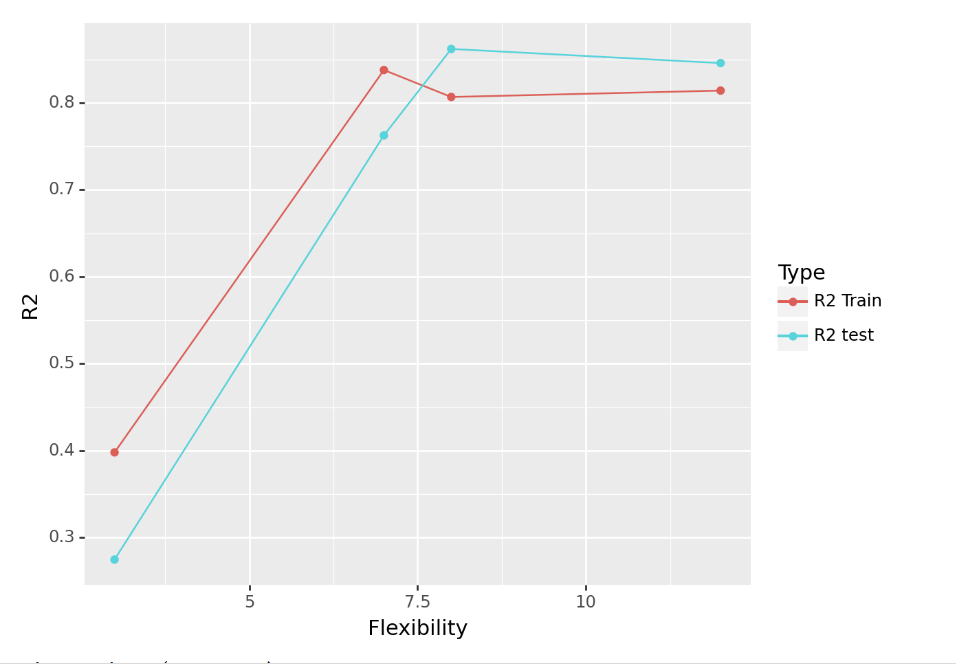

**Graph of KNN**

In [ ]:
data = [[5, r2_train, r2], [7, r6_train, r6], [10, r3_train, r3], [15, r4_train, r4], [20,r5_train, r5]]

# Create the pandas DataFrame
df = pd.DataFrame(data, columns=['K', 'R2 Train', 'R2 test'])

# print dataframe.
df

,K,R2 Train,R2 test
0,5,0.876729,0.828141
1,7,0.870836,0.840440
2,10,0.849899,0.860147
3,15,0.841706,0.854373
4,20,0.835201,0.842738


In [ ]:
long_df = df.melt(id_vars =["K"], var_name = "Type", value_name = "R2")
long_df

,K,Type,R2
0,5,R2 Train,0.876729
1,7,R2 Train,0.870836
2,10,R2 Train,0.849899
3,15,R2 Train,0.841706
4,20,R2 Train,0.835201
5,5,R2 test,0.828141
6,7,R2 test,0.840440
7,10,R2 test,0.860147
8,15,R2 test,0.854373
9,20,R2 test,0.842738


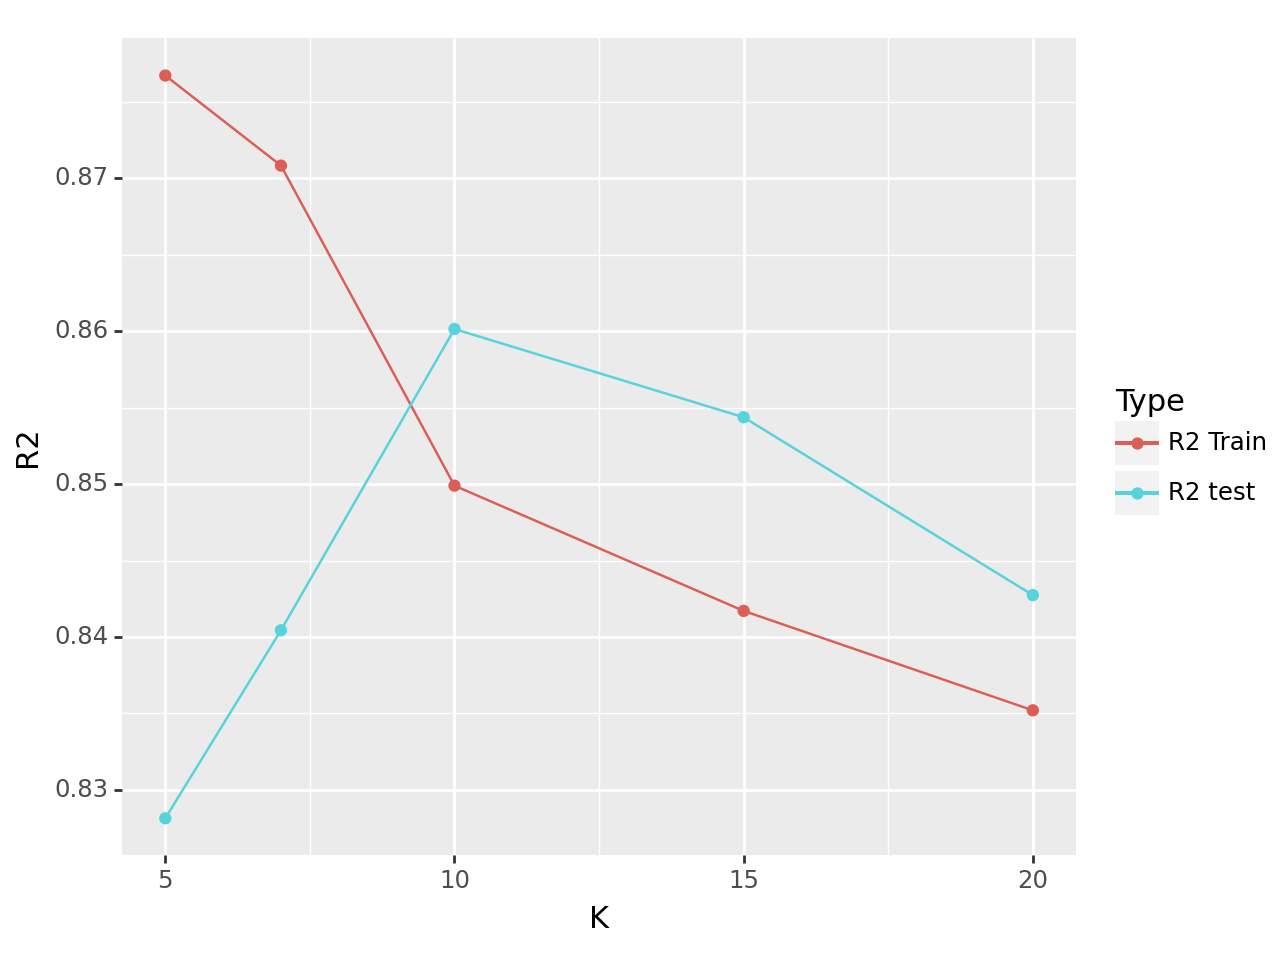

<Figure Size: (640 x 480)>

In [ ]:
from plotnine import *
(ggplot(long_df)
+geom_point(aes(x='K', y = "R2", color = "Type"))
+geom_line(aes(x='K', y = "R2", color = "Type", group = "Type")))

**Decision Tree Graph**

In [ ]:
data = [[.1, r4_train, r4], [.2, r7_train, r7], [0, r8_train, r8], [.5, r9_train, r9], [.7,r10_train, r10]]

# Create the pandas DataFrame
df = pd.DataFrame(data, columns=['Alpha', 'R2 Train', 'R2 test'])

# print dataframe.
df

,Alpha,R2 Train,R2 test
0,0.1,0.841706,0.854373
1,0.2,0.772467,0.770519
2,0.0,1.000000,0.699251
3,0.5,0.677360,0.672286
4,0.7,0.677360,0.672286


In [ ]:
long_df = df.melt(id_vars =["Alpha"], var_name = "Type", value_name = "R2")
long_df

,Alpha,Type,R2
0,0.1,R2 Train,0.841706
1,0.2,R2 Train,0.772467
2,0.0,R2 Train,1.000000
3,0.5,R2 Train,0.677360
4,0.7,R2 Train,0.677360
5,0.1,R2 test,0.854373
6,0.2,R2 test,0.770519
7,0.0,R2 test,0.699251
8,0.5,R2 test,0.672286
9,0.7,R2 test,0.672286


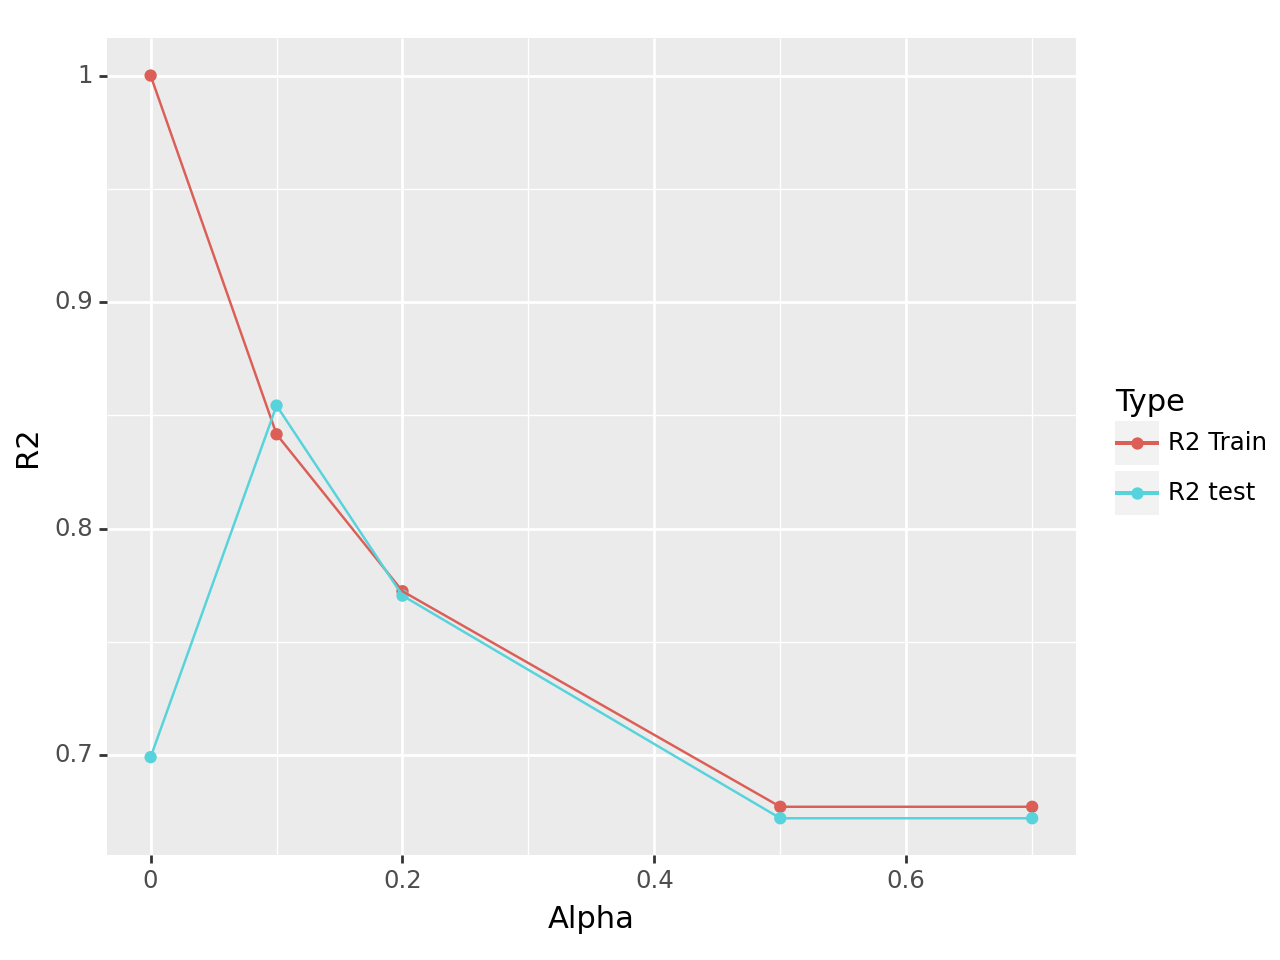

<Figure Size: (640 x 480)>

In [ ]:
from plotnine import *
(ggplot(long_df)
+geom_point(aes(x='Alpha', y = "R2", color = "Type"))
+geom_line(aes(x='Alpha', y = "R2", color = "Type", group = "Type")))

The best model was KNN with 15 as k with an R^2 of 0.86.